<a href="https://colab.research.google.com/github/nuot/AL-Clean/blob/main/AssistantListing_ObliClean_InProgress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assistant Listing Data Cleaning Project, Step 1 for the Legal Template Project.**

**Last Updated: 03/16/2021**

**Author: Nuo Tian**

**Goal: Clean the Obligations column**

retreive funding type(s) for each row: ig.Project Grants, Salaries and 

1.   Retrieve funding type(s) for each row (ie. Project Grants, Salaries and Expenses, Direct Loans...)
2.   For each funding type, retrieve funding amount for each year from 2019 to 2021 (ie. `FY 19$4,70,045.00` means for year 2019, the funding under Project Grants is $4,70,045.00)
3.   Flag if the amount is estimated. (With est, then mark 1, without, then mark 0)




**Snippet of the raw data:**

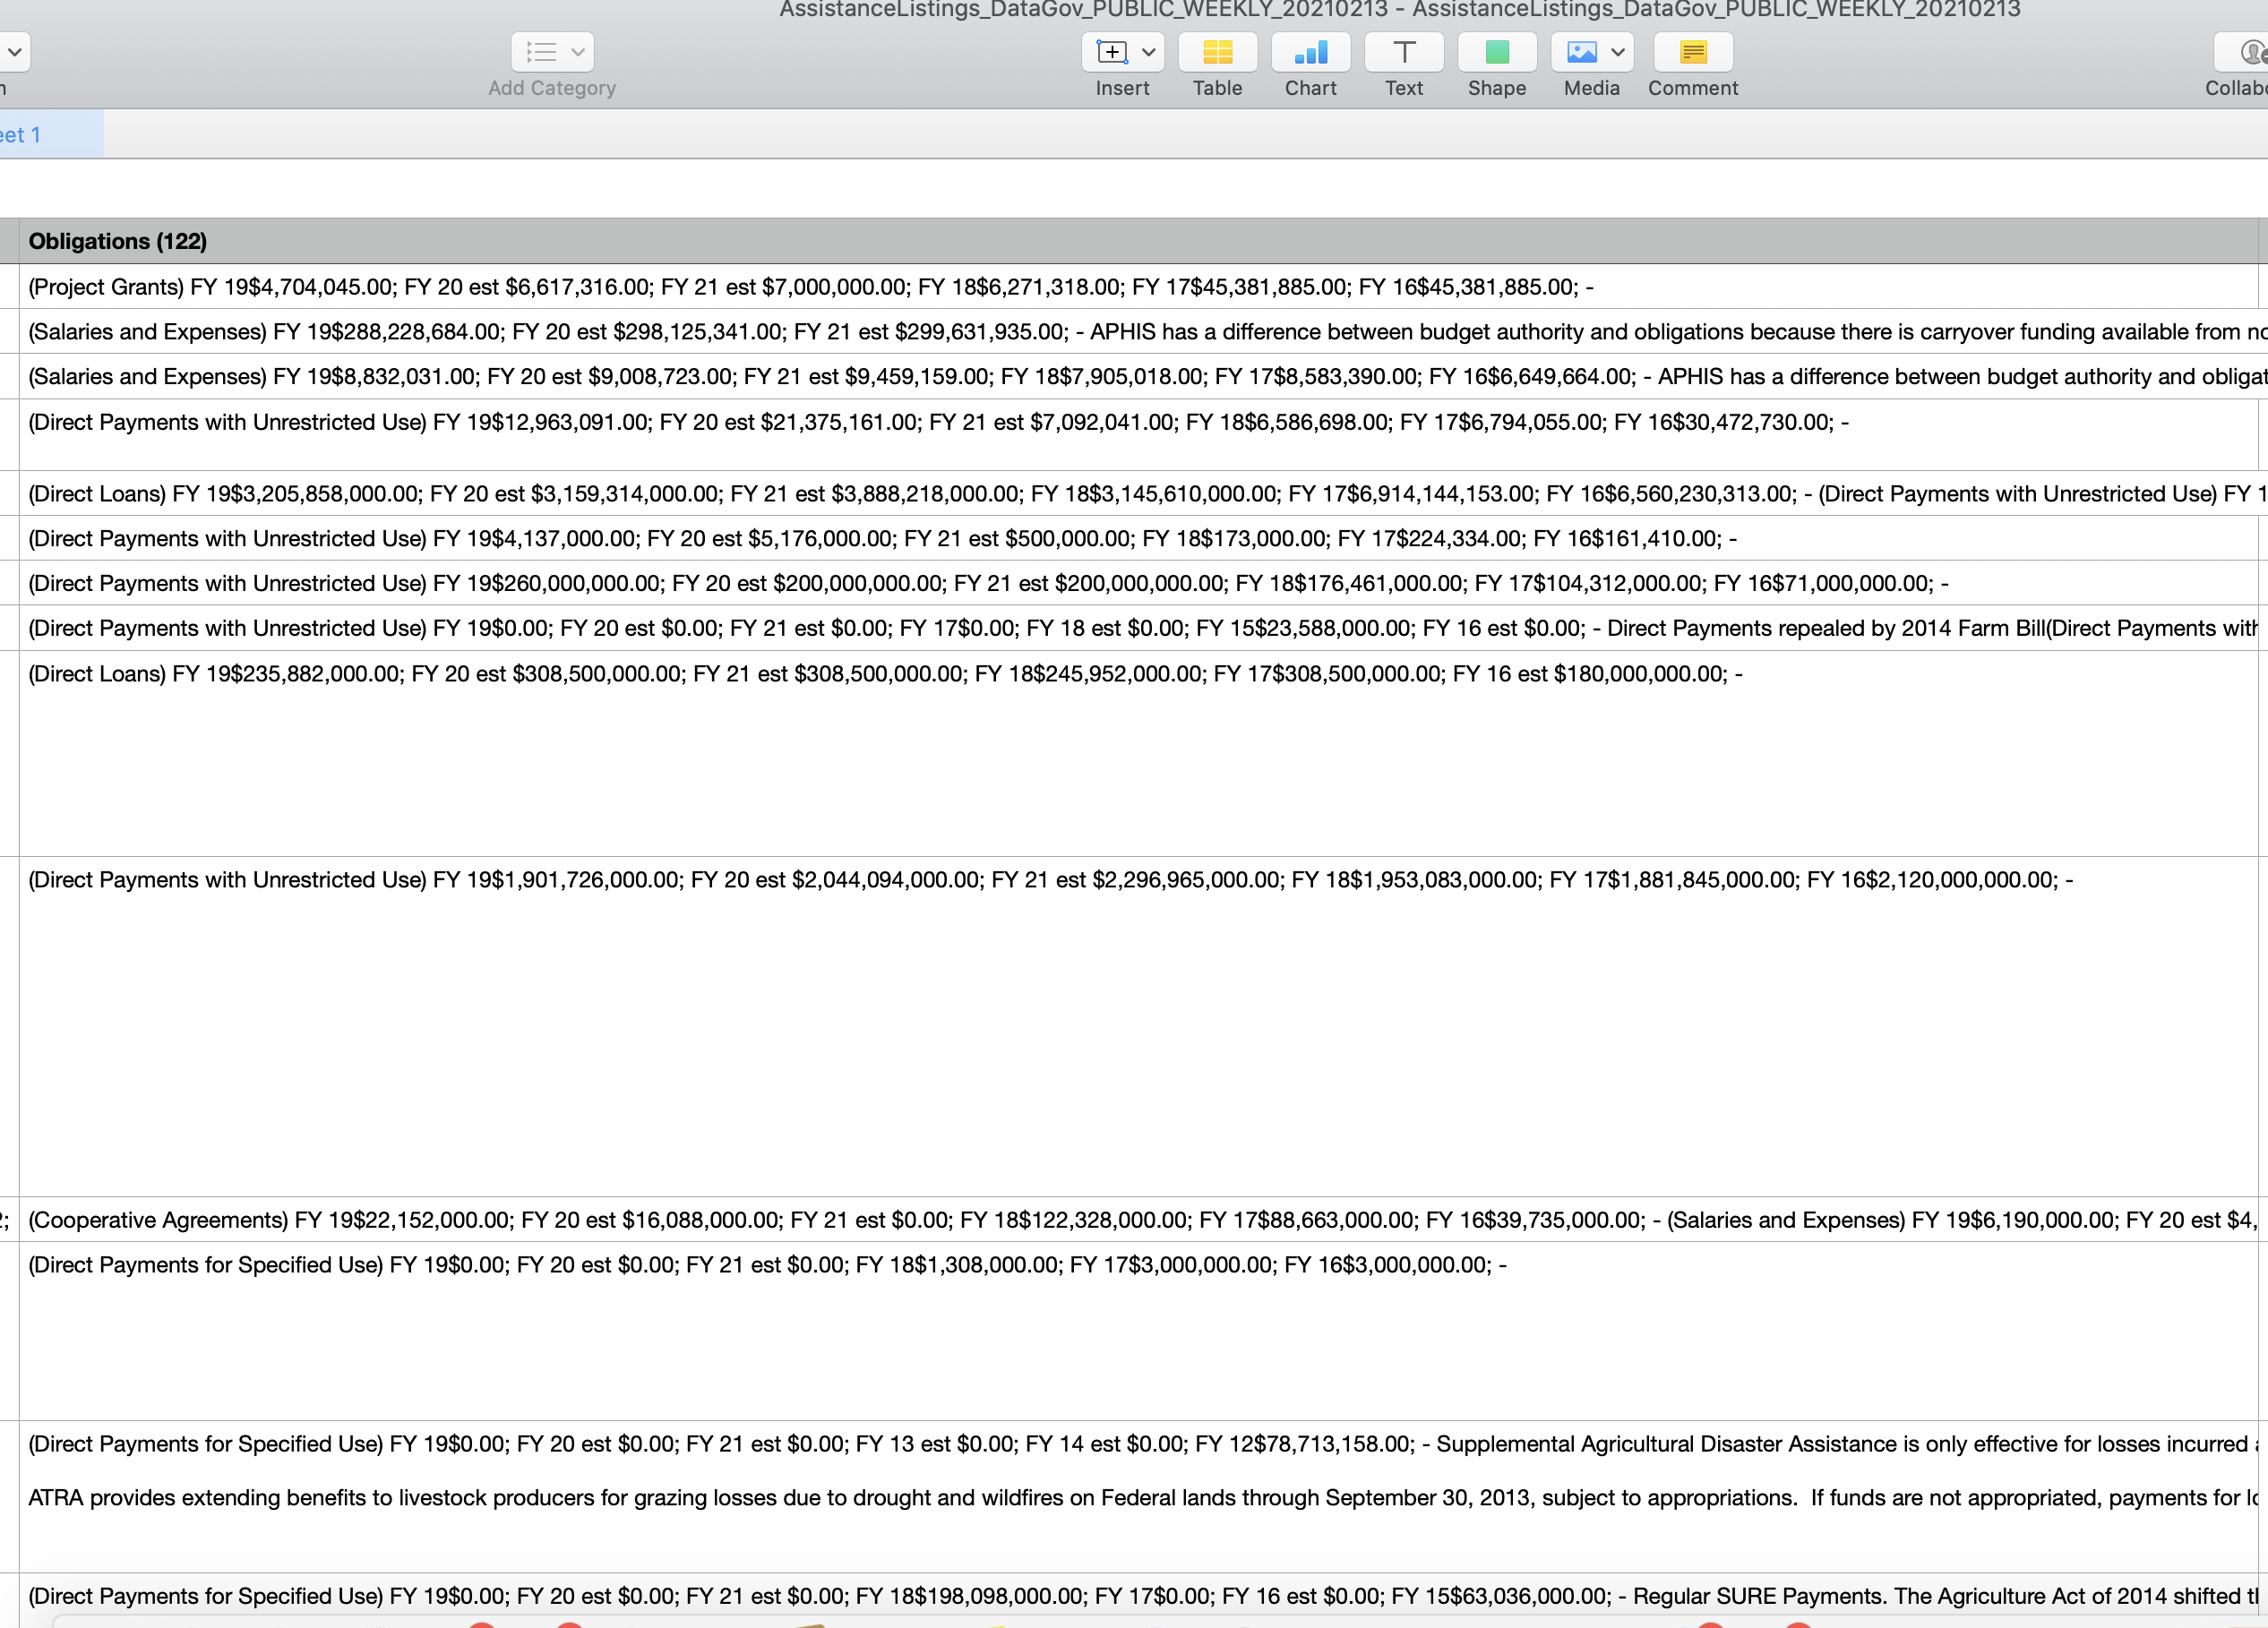

**Result: After cleaning additional columns are generated:**

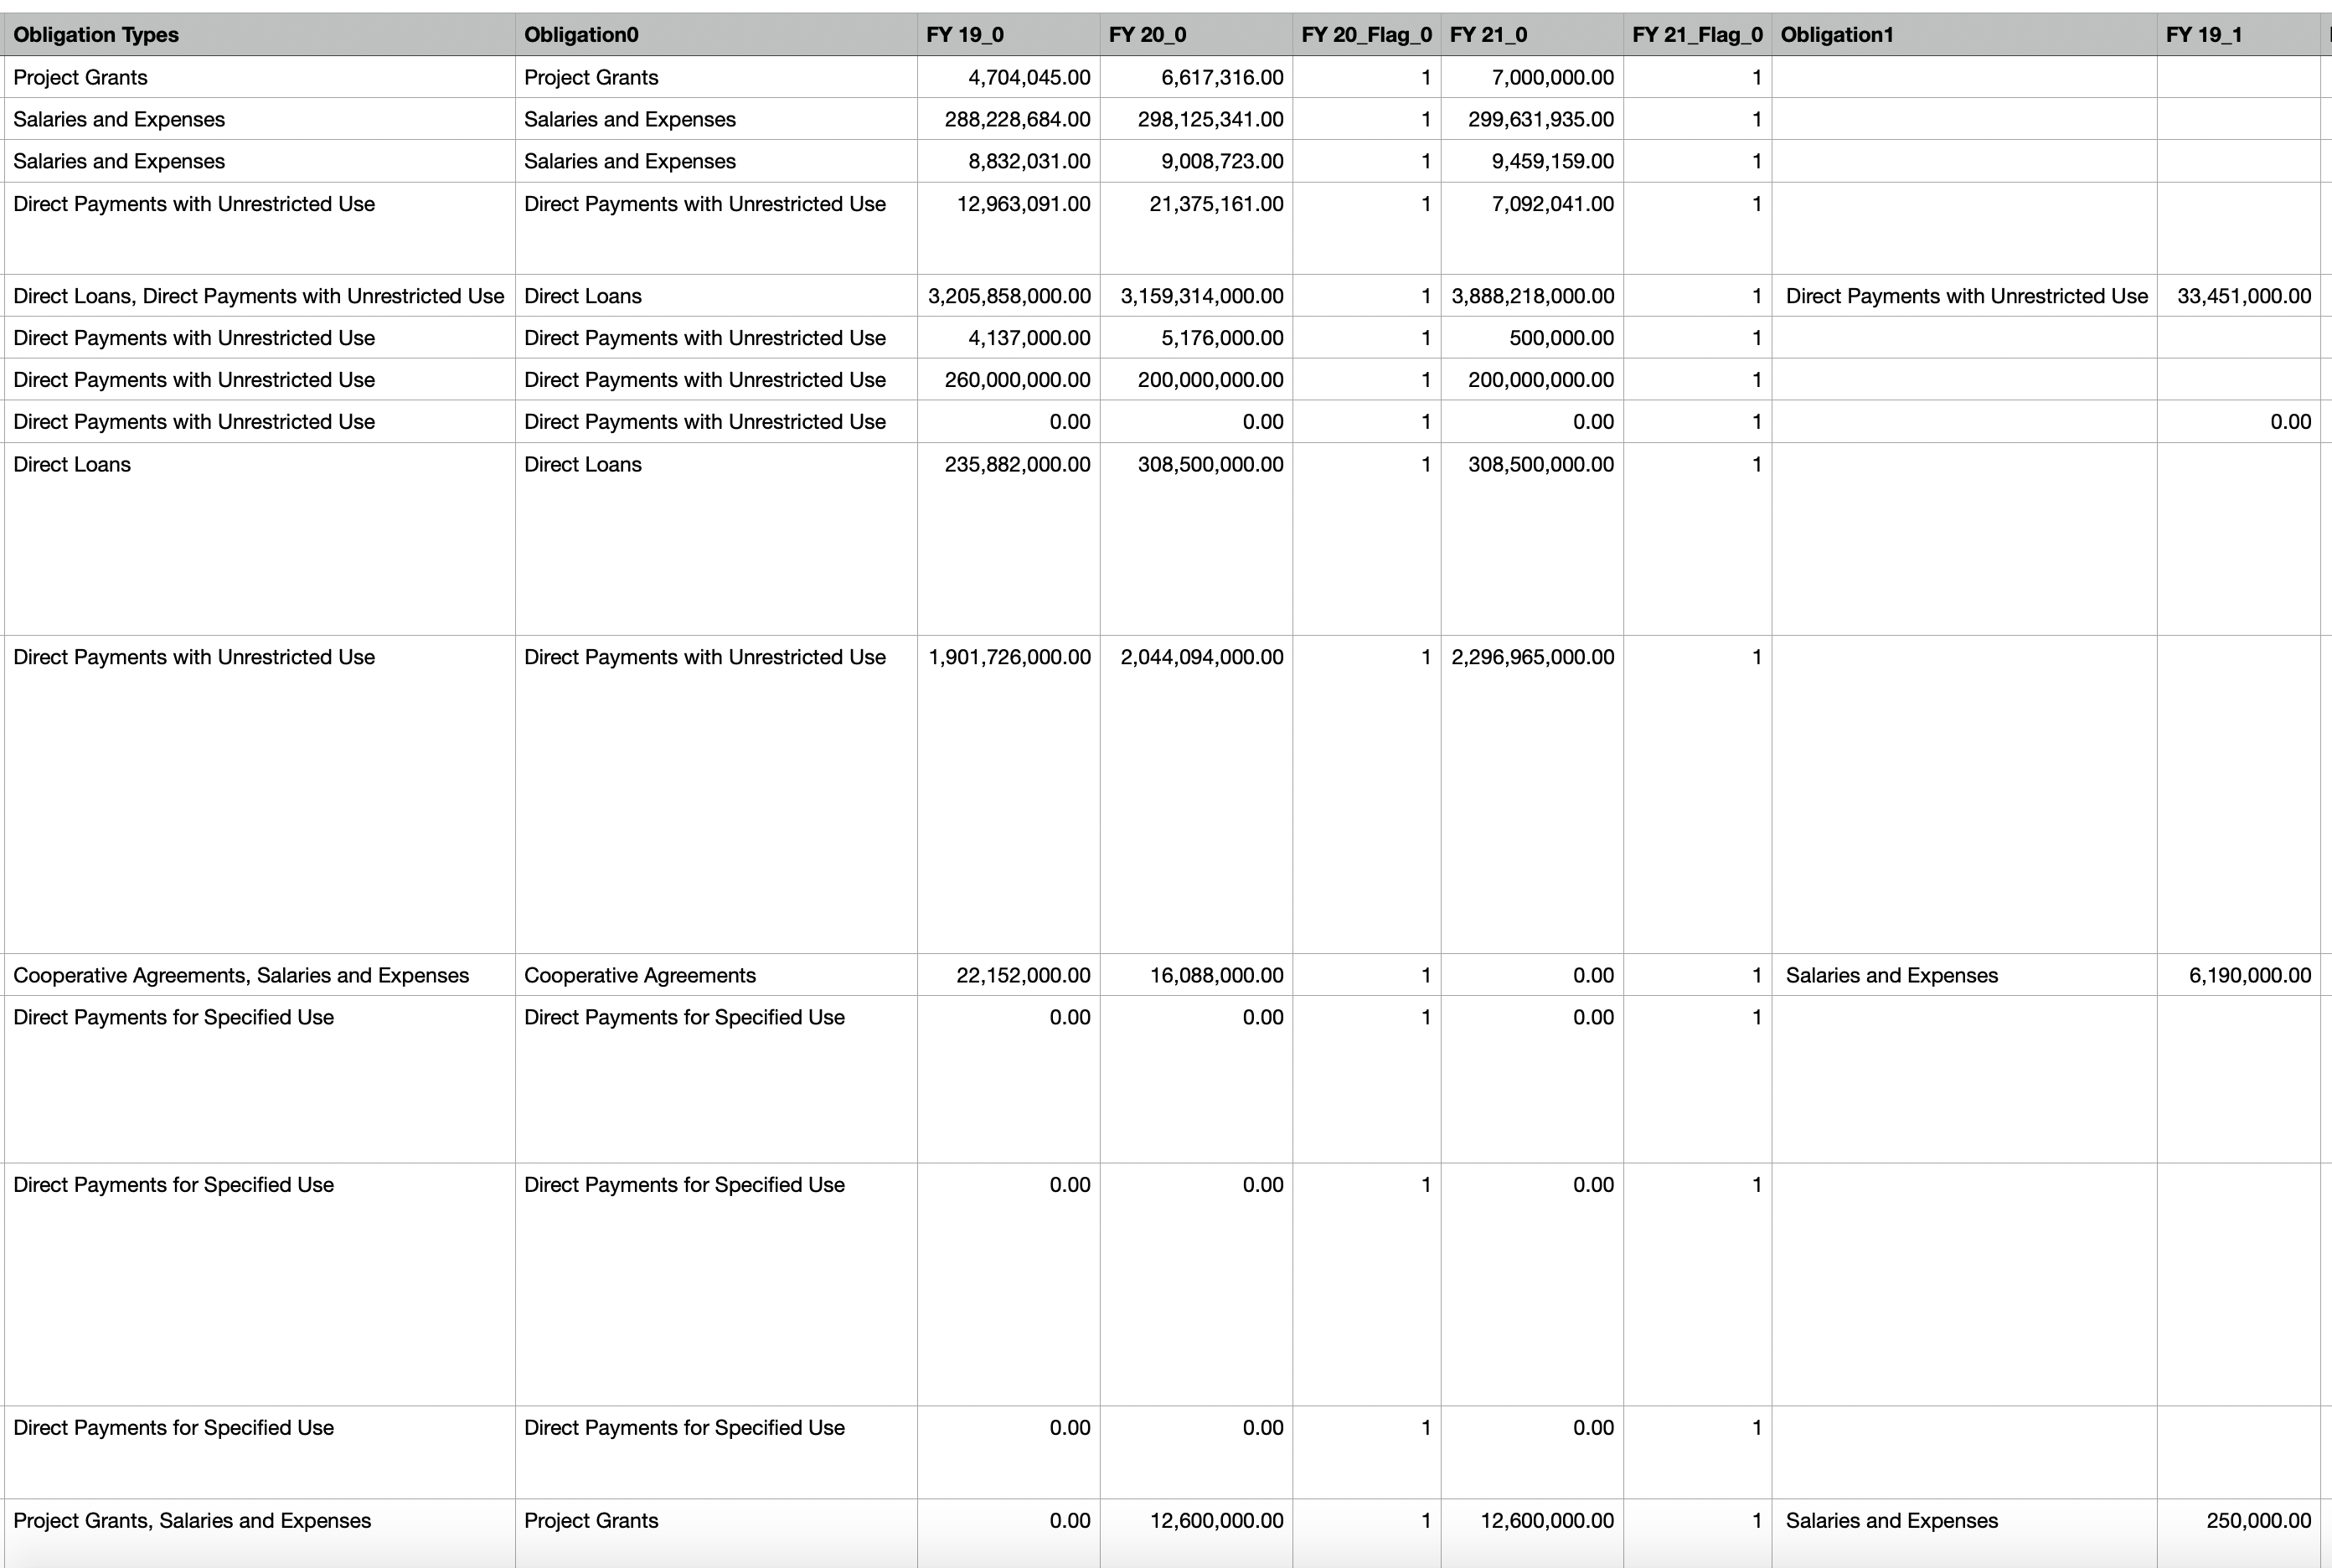

Ask user input for the file name, target the obligation column

In [3]:
import pandas as pd
import re

filename = input("Enter name of input file (including the file extension):")
data = pd.read_csv(filename, encoding='cp1252')

Enter name of input file (including the file extension):AssistanceListings_DataGov_PUBLIC_WEEKLY_20210213 - AssistanceListings_DataGov_PUBLIC_WEEKLY_20210213.csv


Loop through column names, find the column name contains 'Obligation' and get the column name 

In [9]:
colnames = list(data.columns)
obligations_colname = [col for col in colnames if re.findall(r'Obligation', col)][0]
obligations = data[obligations_colname]

In [13]:
data

,Program Title,Program Number,Popular Name (020),Federal Agency (030),Authorization (040),Objectives (050),Types of Assistance (060),Uses and Use Restrictions (070),Applicant Eligibility (081),Beneficiary Eligibility (082),Credentials/Documentation (083),Preapplication Coordination (091),Application Procedures (092),Award Procedure (093),Deadlines (094),Range of Approval/Disapproval Time (095),Appeals (096),Renewals (097),Formula and Matching Requirements (101),Length and Time Phasing of Assistance (102),Reports (111),Audits (112),Records (113),Account Identification (121),Obligations (122),Range and Average of Financial Assistance (123),Program Accomplishments (130),"Regulations, Guidelines, and Literature (140)",Regional or Local Office (151),Headquarters Office (152),Website Address (153),Related Programs (160),Examples of Funded Projects (170),Criteria for Selecting Proposals (180),Published Date,Parent Shortname,URL,Recovery,Obligation Types
0,Agricultural Research Basic and Applied Research,10.001,(Extramural Research),"AGRICULTURAL RESEARCH SERVICE, AGRICULTURE, DE...","{""list"":[{""act"":{""description"":""Food Security ...","To make agricultural research discoveries, eva...",PROJECT GRANTS,Not Applicable,Usually nonprofit institutions of higher educa...,Usually nonprofit institutions of higher educa...,"{""isApplicable"":false}","{""environmentalImpact"":{""reports"":[{""isSelecte...","{""description"":""Letters should be submitted to...","A peer review panel considers each proposal, e...","{""flag"":""no"",""list"":[]}",Not Applicable,None,None,"{""types"":{""moe"":false,""formula"":false,""matchin...","{""awarded"":""other"",""description"":""None"",""award...","[{""code"":""program"",""isSelected"":true,""descript...","{""isApplicable"":true,""description"":""As perform...","Financial records, supporting documents, stati...",12-1400-0-1-352;,"(Project Grants) FY 19$4,704,045.00; FY 20 est...","$5,000 to $50,000. Average $20,000","{""list"":[],""isApplicable"":false}",2 CFR 200,"{""flag"":""appendix"",""description"":""See the Agri...","Deborah Watson5601 Sunnyside Avenue, MS 5110, ...",http://www.ars.usda.gov,10.207 Animal Health and Disease Research; 10....,Not Applicable.,Peer review.,"Jan 01,1965",USDA,https://beta.sam.gov/fal/2cf5bced6e734d309ddad...,No,[Project Grants]
1,"Plant and Animal Disease, Pest Control, and An...",10.025,NaN,"ANIMAL AND PLANT HEALTH INSPECTION SERVICE, AG...","{""list"":[{""act"":{""description"":""Plant Protecti...",To protect U.S. agriculture from economically ...,PROJECT GRANTS,Not Applicable,"Foreign, State, local, and U.S. Territorial go...","Farmers, ranchers, agriculture producers, Stat...","{""description"":""Curriculum vitae for principal...","{""environmentalImpact"":{""reports"":[{""isSelecte...","{""description"":""Comply with E.O. 12372, \""Inte...",Applications are approved by the Administrator...,"{""flag"":""contact"",""list"":[]}",From 60 to 120 days.,None,Based on program needs and availability of ann...,"{""types"":{""moe"":false,""formula"":false,""matchin...","{""awarded"":""other"",""description"":""Up to 1 year...","[{""code"":""program"",""isSelected"":false,""descrip...","{""isApplicable"":true,""description"":""N/A""}",Instruction provided in the Notice of Award. ...,12-9971-0-7-352;12-1600-0-1-352;,"(Salaries and Expenses) FY 19$288,228,684.00; ...",NaN,"{""list"":[{""fiscalYear"":2016,""description"":""Sel...","Uniform Administrative Requirements, Cost Prin...","{""flag"":""appendix"",""description"":""Consult Appe...","Eileen M. Berke,4700 River Road, Unit 55, Rive...",http://www.aphis.usda.gov/,12.100 Aquatic Plant Control; 15.611 Wildlife ...,Not Applicable.,Not Applicable.,"Jan 01,1972",USDA,https://beta.sam.gov/fal/226bb32f9354425f85946...,No,[Salaries and Expenses]
2,Wildlife Services,10.028,NaN,"ANIMAL AND PLANT HEALTH INSPECTION SERVICE, AG...","{""list"":[{""act"":{""description"":""Animal Damage ...",To reduce damage caused by mammals and birds a.

find all types in each row

In [5]:
types = []
for row in obligations:
  a = re.findall(r'\((.*?)\) FY',str(row))
  if a:
    types.append(a)
  else:
    types.append('None')

In [6]:
types_dedup = []
for type1 in types:
    type1 = list(dict.fromkeys(type1))
    types_dedup.append(type1)

In [7]:
data['Obligation Types'] = types_dedup

Next working on seprating the $amount for each obligation type

In [ ]:
def listToStringWithoutBrackets(list1):
    return str(list1).replace('[','').replace(']','').replace("'","")

In [ ]:
Obli_types = []
for i in range(len(data['Obligation Types'])):
  res = listToStringWithoutBrackets(data['Obligation Types'][i])
  Obli_types.append(res)

In [ ]:
data['Obligation Types'] = Obli_types

In [ ]:
maxlen = max(list(map(lambda x: len(x.split(",")) ,data['Obligation Types'])))
cols = ["Obligation"+str(x)   for x in range(maxlen)]
datalist = list(map(lambda x: x.split(","), data['Obligation Types']))
newdf = pd.DataFrame(data=datalist, columns=cols) 
data = pd.concat([data, newdf], axis=1) 

In [ ]:
#mask = data.applymap(lambda x: x is None)
#cols = data.columns[(mask).any()]
#for col in data[cols]:
    #data.loc[mask[col], col] = ''

Amount

In [ ]:
obli1 = obligations.str.split(')', expand=True)

In [ ]:
df = pd.DataFrame()

i = 0
for i in range(len(obli1.columns)):
  val = []
  for row in obli1[i]:
    a = re.findall(r'FY [0-9][0-9]\$[^\]]+[.%]?',str(row))
    b = re.findall(r'FY [0-9][0-9] est \$[^\]]+[.%]?',str(row))
    if a:
      val.append(a)
    elif b:
      val.append(b)
    else:
      val.append('')
  df.insert(i, i, val, True) 


In [ ]:
df = df.applymap(str)

In [ ]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace("['", "")
        text = text.replace("- ']", "")
    return text

In [ ]:
i = 0
while i < len(df.columns):
  df[i] = df[i].apply(remove_punctuations)
  i +=1

In [ ]:
e1 = df[1][0].replace('$', ';')
e1 = e1.split(';')

In [ ]:
for j in range(maxlen):
  FY1 = []
  FY2 = []
  FY2_Flag = []
  FY3 = []
  FY3_Flag = []
  name = 'Obligation'+str(j)
  pattern1 = e1[0] + '\$[^\]]+[.%]?'
  pattern2 = e1[2].lstrip() + '\$[^\]]+[.%]?'
  pattern2_1 = re.sub(' est', '', e1[2]).strip() + '\$[^\]]+[.%]?'
  pattern3 = e1[4].lstrip() + '\$[^\]]+[.%]?'
  pattern3_1 = re.sub(' est', '', e1[4]).strip() + '\$[^\]]+[.%]?'
  rep1 = e1[0]+'$'
  rep2 = re.sub(' est', '', e1[2]).strip() + '$'
  rep3 = e1[2].lstrip()+'$'
  rep4 = re.sub(' est', '', e1[4]).strip() + '$'
  rep5 = e1[4].lstrip()+'$'
  for i in range(len(df[j])):  
    a = re.findall(pattern1,df[j+1][i])
    b = re.findall(pattern2_1,df[j+1][i])
    c = re.findall(pattern2, df[j+1][i])
    d = re.findall(pattern3_1,df[j+1][i])
    e = re.findall(pattern3, df[j+1][i])
    if a :
      FY1.append(a[0].split(';')[0].replace(rep1,''))
    else:
      FY1.append('')
    if b:
      FY2.append(b[0].split(';')[0].replace(rep2,''))
      FY2_Flag.append(0)
    elif c:
      FY2.append(c[0].split(';')[0].replace(rep3,''))
      FY2_Flag.append(1)
    else:
      FY2.append('')
      FY2_Flag.append('')
    
    if d:
      FY3.append(d[0].split(';')[0].replace(rep4,''))
      FY3_Flag.append(0)
    elif e:
      FY3.append(e[0].split(';')[0].replace(rep5,''))
      FY3_Flag.append(1)
    else:
      FY3.append('')
      FY3_Flag.append('')

  data.insert(data.columns.get_loc(name) + 1, rep4.strip('$')+ '_Flag_' + str(j), FY3_Flag)
  data.insert(data.columns.get_loc(name) +1, rep4.strip('$') + '_' + str(j), FY3)
  data.insert(data.columns.get_loc(name) +1, rep2.strip('$') +'_Flag_' + str(j), FY2_Flag)
  data.insert(data.columns.get_loc(name) +1, rep2.strip('$')+ '_' + str(j), FY2)
  data.insert(data.columns.get_loc(name) +1, rep1.strip('$')+ '_' + str(j), FY1)

In [ ]:
filename

'AssistanceListings_DataGov_PUBLIC_WEEKLY_20210213 - AssistanceListings_DataGov_PUBLIC_WEEKLY_20210213.csv'

In [ ]:
reference_Data = re.findall('\d+', filename)[0]

In [ ]:
data['Reference_Date'] = reference_Data

In [ ]:
data.to_csv('AssistanceListingFinal.csv')